<ipython-input-14-f6a77b934c79>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model1.fit(x_train,y_train)
<ipython-input-14-f6a77b934c79>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model1.fit(x_train,y_train)
<ipython-input-14-f6a77b934c79>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model1.fit(x_train,y_train)
<ipython-input-14-f6a77b934c79>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model1.fit(x_train,y_train)
<ipython-input-14-f6a77b934c79>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expe

Best Accuracy Model of KNN :  {'ts': 0.1}
Best Accuracy Score of KNN :  0.4896810506566604
Best Accuracy Model of DT :  {'ts': 0.1}
Best Accuracy Score of DT :  0.551594746716698
Predicted value of KNN :  [6]
Predicted value of DT :  [6]


<ipython-input-14-f6a77b934c79>:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model1.fit(x_train,y_train)


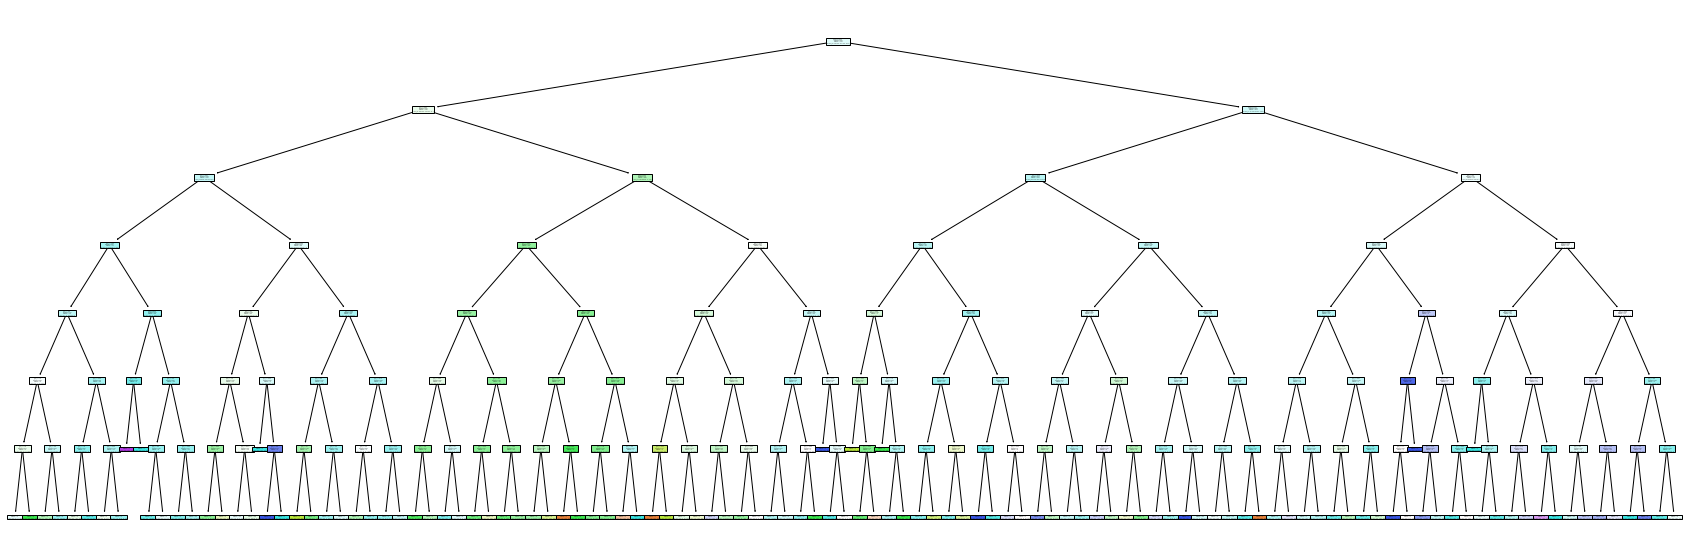

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score

df = pd.read_csv('winequalityN.csv')
df=df.drop_duplicates()
df=df.fillna(df.mean())
df1=pd.get_dummies(df)

x = df1.drop('quality',axis=1)
y = df1[['quality']]
acc_KNN = 0
acc_DT=0
acc_model_KNN = {}
acc_model_DT={}
for i in [0.1,0.2,0.3,0.4,0.5]:
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=i,random_state=10)
    model1 = KNeighborsClassifier(n_neighbors=71)
    model1.fit(x_train,y_train)
    y_pred1 = model1.predict(x_test)
    acc1 = accuracy_score(y_test,y_pred1)
    
    modal2=DecisionTreeClassifier(criterion='entropy',random_state=10,max_depth=7)
    modal2.fit(x_train,y_train)
    y_pred2=modal2.predict(x_test)
    acc2=accuracy_score(y_test,y_pred2)
    
    if acc1 > acc_KNN:
        acc_KNN = acc1
        acc_model_KNN = {'ts':i}
    if acc2 > acc_DT:
        acc_DT = acc2
        acc_model_DT = {'ts':i}
        
print("Best Accuracy Model of KNN : ",acc_model_KNN)
print("Best Accuracy Score of KNN : ",acc_KNN)
print("Best Accuracy Model of DT : ",acc_model_DT)
print("Best Accuracy Score of DT : ",acc_DT)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=acc_model_KNN['ts'],random_state=10)
model1 = KNeighborsClassifier(n_neighbors=71)
model1.fit(x_train,y_train)
y_KNN=model1.predict([[6.5,0.34,0.3,0.3,0.03,73,130,0.9,3,0.4,12,1,0]])
print("Predicted value of KNN : ",y_KNN)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=acc_model_DT['ts'],random_state=10)
modal2=DecisionTreeClassifier(criterion='entropy',random_state=10,max_depth=7) 
modal2.fit(x_train,y_train)
y_DT=modal2.predict([[6.5,0.34,0.3,0.3,0.03,73,130,0.9,3,0.4,12,1,0]])
print("Predicted value of DT : ",y_DT)

plt.figure(figsize=(30,10))
plot_tree(modal2,filled=True)
plt.show()